In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from scipy.spatial import distance
from six import StringIO
import pydot
from keras.datasets import mnist
import seaborn as sns

## Ex. 1 - kNN - own implementation


In [ ]:
def neighbours(data, new_point, k):
  distances = []
  for idx in range(len(data)):
    point = data[idx]
    dst = distance.euclidean(new_point, point) #computing distance to every other point from training set
    distances.append((point, idx, dst))
  distances.sort(key=lambda tup: tup[2]) #sorting distances from smallest to biggest
  nearest = distances[0:k] #getting only k nearest neighbours
  out = [(point, idx) for point, idx, dist in nearest] #returning neighbours and their indexes

  return out
 

def predict(X_train, y_train, new_point, k):
  neighbours_list = neighbours(X_train, new_point, k) #generating k nearest neigbours
  nearest_labels = []
  for point, idx in neighbours_list:
    nearest_labels.append(y_train[idx]) #making list of labels of k nearest neighbours
  prediction = max(nearest_labels, key=nearest_labels.count) #getting the most frequent label
  return prediction

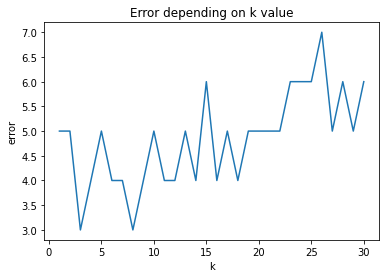

In [ ]:
iris = datasets.load_iris()
 
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.5)
 
# Checking the effectiveness of the classifier
ks = range(1, 31)

errors = []
for _ in range(30):
  errors1 = []
  accs = []
  for k in ks:
    predictions = [predict(features_train, labels_train, new_point, k) for new_point in features_test]
    error = sum([i != j for i, j in zip(predictions, labels_test)]) #summing all elements fitted wrongly
    errors1.append(error)
    output = accuracy_score(labels_test, predictions)
    accs.append(output)
  errors.append(errors1)

error_arr = np.array(errors)
err_mean = np.mean(error_arr, axis=0)

plt.plot(ks, err_mean)
plt.xlabel("k")
plt.ylabel("error")
plt.title("Error depending on k value")
plt.show()

In [ ]:
k = 8 #chosing one of the optimal ks
predictions = [predict(features_train, labels_train, new_point, k) for new_point in features_test]
error = sum([i != j for i, j in zip(predictions, labels_test)]) #summing all elements fitted wrongly
output = accuracy_score(labels_test, predictions)
print("Number of wrongly predicted points:", error)
print("Accuracy:", output)

Number of wrongly predicted points: 3
Accuracy: 0.96


## Ex. 2 - kNN - Python (sklearn)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(features_train, labels_train)
score = knn.score(features_test, labels_test)
print("Built-in KNN alghorithm accuracy:", score) # scores are the same, so my own implementation is right

Built-in KNN alghorithm accuracy: 0.96


## Ex.3 - Decision trees

In [ ]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)
clf.predict(iris.data[:1, :])
clf.predict_proba(iris.data[:1, :])

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf") #saving graph to pdf file

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Standardization
for i in range(X_train.shape[0]):
    X_train[i,:] = X_train[i,:]/np.std(X_train[i,:])

for i in range(X_test.shape[0]):
    X_test[i,:] = X_test[i,:]/np.std(X_test[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y_train[np.where(y_train==10)]=0
y_test[np.where(y_test==10)]=0
 
# the height and width of the picture with the number
h = 20
w = 20

print("Number of digits:", X_train.shape[0] + X_test.shape[0])
print("Number of pixels per image:", X_train.shape[1]*X_train.shape[2])

Number of digits: 70000
Number of pixels per image: 784


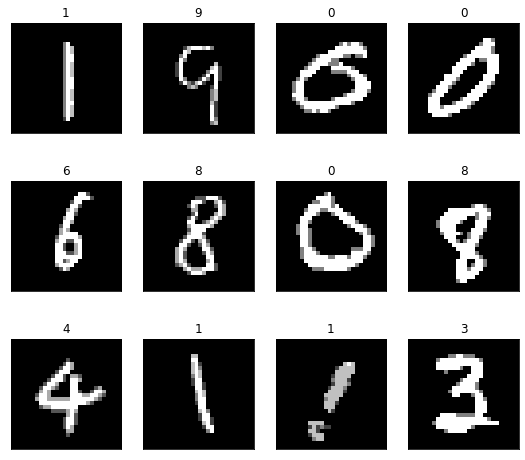

In [ ]:
plt.rcParams["figure.figsize"] = (h, w)
def plot_mnist(images, titles, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

idxs = np.random.randint(6000, size = 12)

images = []
titles = []
for idx in idxs:
  images.append(X_train[idx])
  titles.append(y_train[idx])

plot_mnist(images, titles)

In [ ]:
X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

t = tree.DecisionTreeClassifier(max_depth=10)
t.fit(X_train, y_train)
predictions = t.predict(X_test)
print("Accuracy:", t.score(X_test, y_test))

Accuracy: 0.8366


In [ ]:
print("F1 score:", f1_score(y_test, predictions, average='macro'))

F1 score: 0.83511252203984


In [ ]:
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       980
           1       0.95      0.94      0.95      1135
           2       0.80      0.81      0.81      1032
           3       0.80      0.77      0.78      1010
           4       0.81      0.83      0.82       982
           5       0.73      0.80      0.76       892
           6       0.91      0.85      0.88       958
           7       0.91      0.85      0.88      1028
           8       0.79      0.79      0.79       974
           9       0.79      0.80      0.79      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Confusion matrix:
 [[ 893    0   19    9    8   15   11    8    9    8]
 [   4 1063   23    8    2    9    5    4   16    1]
 [  21   13  837   16   27   13   15   19   63    8]
 [  12    3   29  777    6  110    8   16   23   26]
 [  10    4    8   10  814   19   17    7   19   74]
 [  12    3   16   81   24  710   10    6   17   13]
 [  27    2   20    4   32   22  818    3   27    3]
 [   9    6   33   16   26    7    1  877   11   42]
 [  19   14   40   24   18   33    8    6  772   40]
 [  14    6   19   29   54   40    4   16   22  805]]


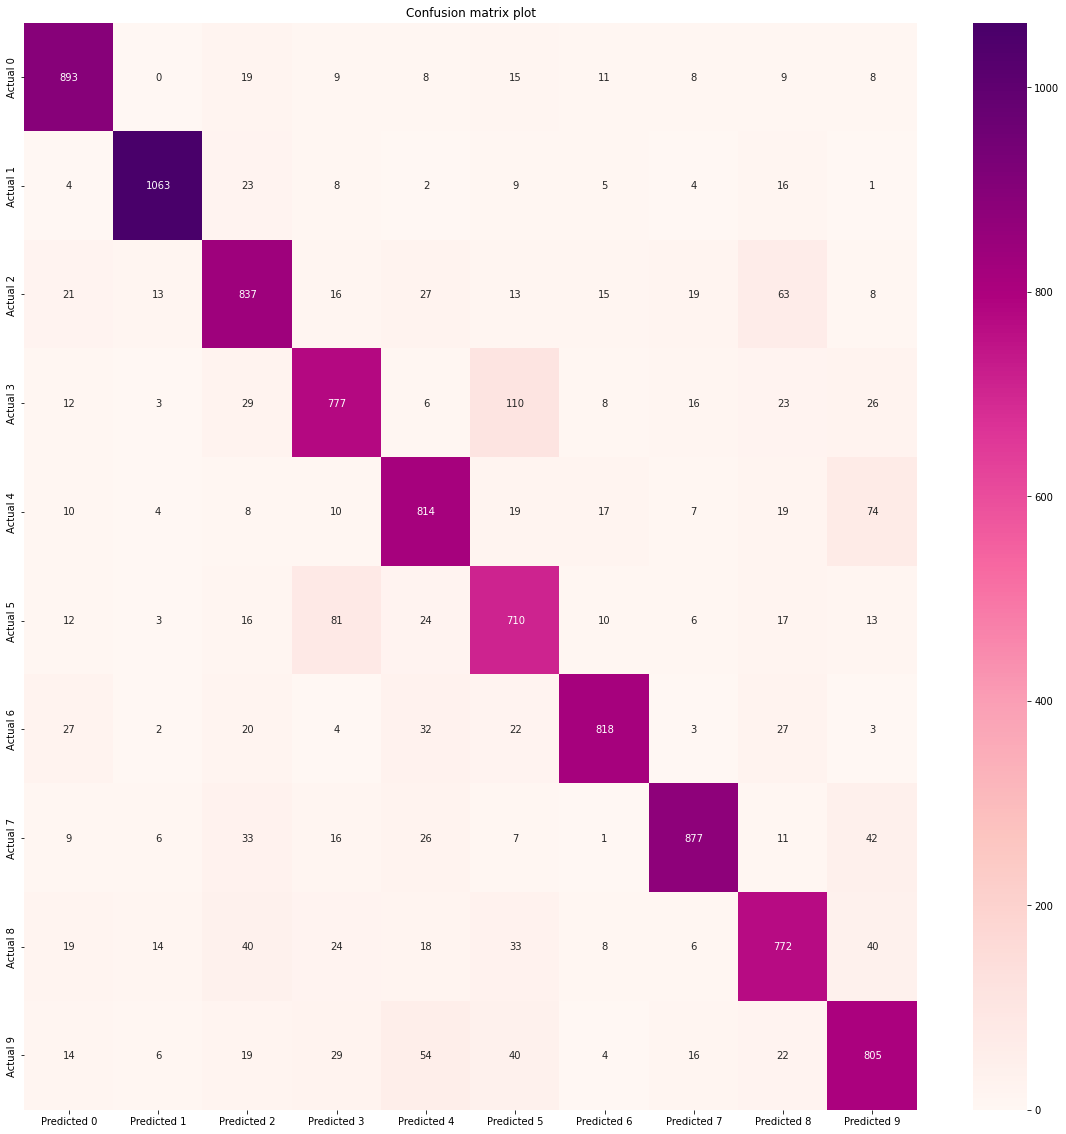

In [ ]:
m = confusion_matrix(y_test, predictions)

print('Confusion matrix:\n', m)
idxs = ['Actual ' + digit for digit in target_names]
cols = ['Predicted ' + digit for digit in target_names]

cm_matrix = pd.DataFrame(data=m, index=idxs, columns=cols)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdPu')
plt.title("Confusion matrix plot")
plt.show()